In [11]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

df = pd.read_csv('./data/btc-usd-max.csv',index_col=0,parse_dates=True )
df = df.resample('D').first()
df['price'].fillna(method='ffill', inplace=True)
# to get the log price
# df['price'] = np.log(df['price'])
df.head()

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


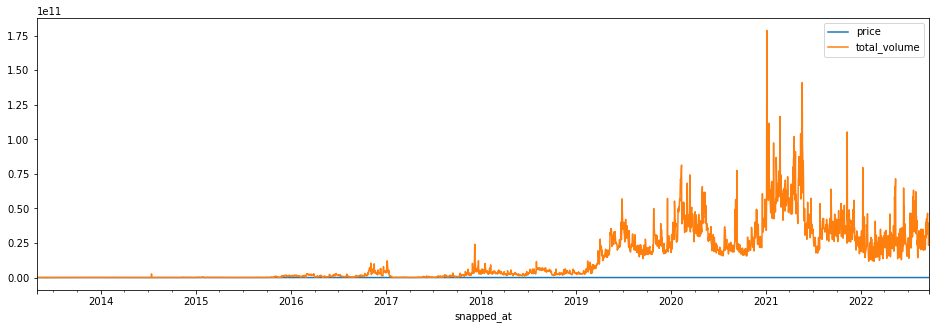

In [12]:
df[['price','total_volume']].plot(figsize=(16,5));

In [4]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [7]:
df2 = df

In [10]:
df2.dropna(inplace=True)
grangercausalitytests(df2[['price','total_volume']],maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8876  , p=0.1696  , df_denom=3427, df_num=1
ssr based chi2 test:   chi2=1.8893  , p=0.1693  , df=1
likelihood ratio test: chi2=1.8887  , p=0.1693  , df=1
parameter F test:         F=1.8876  , p=0.1696  , df_denom=3427, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0794  , p=0.3399  , df_denom=3424, df_num=2
ssr based chi2 test:   chi2=2.1621  , p=0.3392  , df=2
likelihood ratio test: chi2=2.1614  , p=0.3394  , df=2
parameter F test:         F=1.0794  , p=0.3399  , df_denom=3424, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4940  , p=0.2141  , df_denom=3421, df_num=3
ssr based chi2 test:   chi2=4.4912  , p=0.2131  , df=3
likelihood ratio test: chi2=4.4883  , p=0.2133  , df=3
parameter F test:         F=1.4940  , p=0.2141  , df_denom=3421, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2112  , p=0.

In [28]:
df['price'].iloc[-365:].iplot();
df['total_volume'].iloc[-365:].iplot();

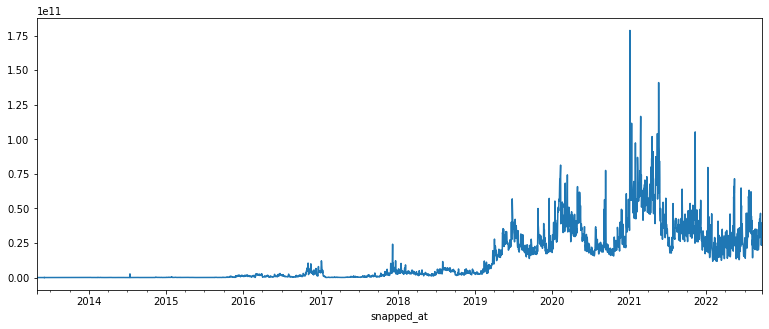

In [20]:
df['total_volume'].plot(figsize=(13,5));

In [39]:
df.iloc[-150:].iplot(y="price",
               secondary_y='total_volume', secondary_y_title="Volume",
               xTitle="Date");

In [35]:
df['total_volume'].shift(2)

snapped_at
2013-04-28 00:00:00+00:00             NaN
2013-04-29 00:00:00+00:00             NaN
2013-04-30 00:00:00+00:00    0.000000e+00
2013-05-01 00:00:00+00:00    0.000000e+00
2013-05-02 00:00:00+00:00    0.000000e+00
                                 ...     
2022-09-17 00:00:00+00:00    3.578902e+10
2022-09-18 00:00:00+00:00    3.371596e+10
2022-09-19 00:00:00+00:00    3.018774e+10
2022-09-20 00:00:00+00:00    2.339449e+10
2022-09-21 00:00:00+00:00    2.868976e+10
Freq: D, Name: total_volume, Length: 3434, dtype: float64